In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
#read data
df=pd.read_csv('Eurocrisis.csv')

In [4]:
df.head()

,Creditor,Debtor,Amount,Risk
0,Japan,United States,796.0,Stable
1,France,Italy,366.0,High Risk
2,Britain,United States,345.0,Stable
3,Spain,Britain,326.0,Stable
4,Germany,United States,324.0,Stable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Creditor  45 non-null     object 
 1   Debtor    45 non-null     object 
 2   Amount    45 non-null     float64
 3   Risk      45 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [6]:
df.describe()

,Amount
count,45.000000
mean,86.744222
std,154.444738
min,0.340000
25%,3.770000
50%,19.400000
75%,62.000000
max,796.000000


In [7]:
#check missing values
df.isnull().sum()

Creditor    0
Debtor      0
Amount      0
Risk        0
dtype: int64

# Graphs


<AxesSubplot:>

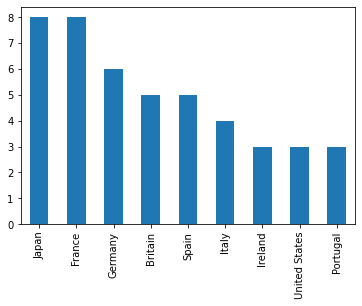

In [25]:
# Graph of country gives debt to how many countries
df['Creditor'].value_counts().plot(kind='bar')

<AxesSubplot:>

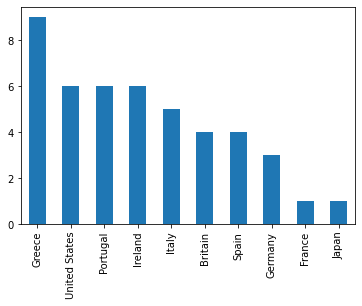

In [26]:
# Graph of country take debt from how many countries
df['Debtor'].value_counts().plot(kind='bar')

In [29]:
#japan is give max debt to america and america take max debt from japan and risk is stable
df[df['Amount']==df['Amount'].max()]

,Creditor,Debtor,Amount,Risk
0,Japan,United States,796.0,Stable


In [30]:
#ireland give min debt to greece and risk is high
df[df['Amount']==df['Amount'].min()]

,Creditor,Debtor,Amount,Risk
44,Ireland,Greece,0.34,High Risk


C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

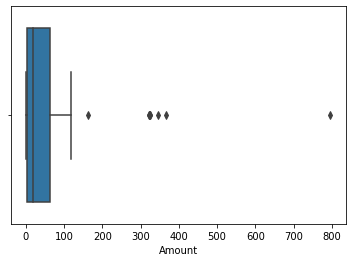

In [31]:
#checking outliers
sns.boxplot(df['Amount'])

In [13]:
df.sample(5)

,Creditor,Debtor,Amount,Risk
14,France,Germany,53.8,Stable
18,Japan,Britain,28.2,Stable
16,Japan,Italy,38.8,High Risk
20,Japan,Spain,25.9,Medium Risk
0,Japan,United States,796.0,Stable


In [32]:
#group risk acc to amount
x=df.groupby('Risk')['Amount']

<AxesSubplot:ylabel='Amount'>

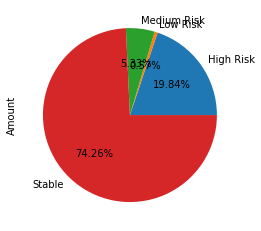

In [33]:
#74% money is in stable risk
#19% money is in high risk
x.sum().plot(kind='pie',autopct="%0.2f%%")

<AxesSubplot:xlabel='Risk'>

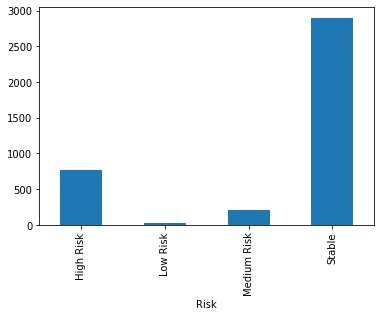

In [35]:
#show how sum of amount risk state
x.sum().plot(kind='bar')

In [17]:
df.columns

Index(['Creditor', 'Debtor', 'Amount', 'Risk'], dtype='object')

<AxesSubplot:xlabel='Creditor'>

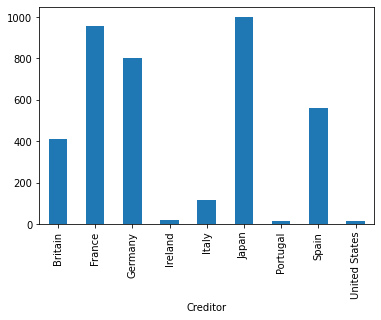

In [36]:
#graph of that country how much debt
df.groupby('Creditor')['Amount'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Debtor'>

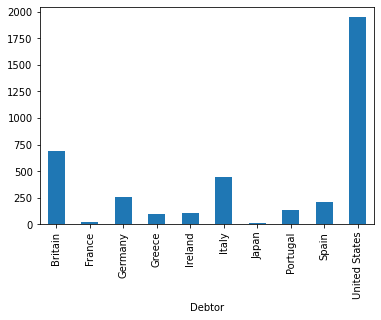

In [37]:
#show which country is take how much debt
df.groupby('Debtor')['Amount'].sum().plot(kind='bar')

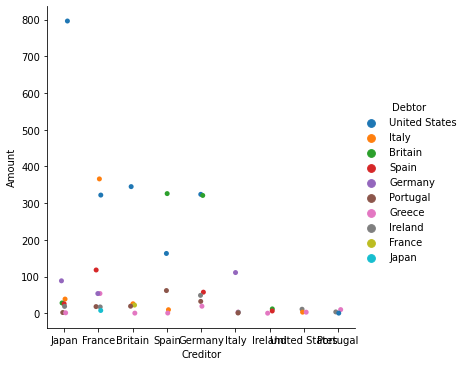

In [38]:
#plot of creditor and amount
sns.catplot(x='Creditor',y='Amount',kind='strip',data=df,hue='Debtor')

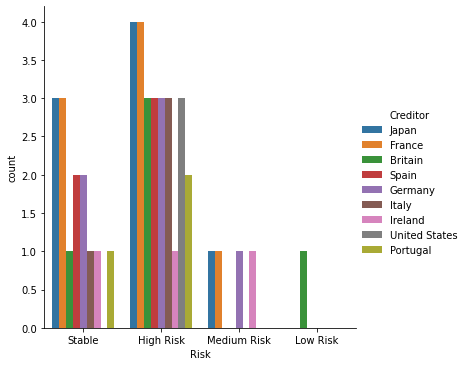

In [39]:
#show which country has how much money is risk
sns.catplot(x='Risk',kind='count',data=df,hue='Creditor')

In [40]:
#show which country give loan to country and in line
df.pivot_table(index='Creditor',columns='Debtor',values='Amount',aggfunc='sum').reset_index()

Debtor,Creditor,Britain,France,Germany,Greece,Ireland,Italy,Japan,Portugal,Spain,United States
0,Britain,NaN,22.4,NaN,0.55,NaN,26.00,NaN,19.40,NaN,345.00
1,France,NaN,NaN,53.8,53.90,17.30,366.00,7.73,18.30,118.00,322.00
2,Germany,321.0,NaN,NaN,19.30,48.90,NaN,NaN,32.50,57.60,324.00
3,Ireland,12.0,NaN,NaN,0.34,NaN,NaN,NaN,NaN,6.38,NaN
4,Italy,NaN,NaN,111.0,3.22,2.83,NaN,NaN,0.87,NaN,NaN
5,Japan,28.2,NaN,88.5,1.37,18.90,38.80,NaN,2.18,25.90,796.00
6,Portugal,NaN,NaN,NaN,10.10,3.77,NaN,NaN,NaN,NaN,0.52
7,Spain,326.0,NaN,NaN,0.78,NaN,9.79,NaN,62.00,NaN,163.00
8,United States,NaN,NaN,NaN,3.10,11.10,3.16,NaN,NaN,NaN,NaN


In [41]:
#show which country taake loan to country and in line
df.pivot_table(index='Debtor',columns='Creditor',values='Amount',aggfunc='sum').reset_index()

Creditor,Debtor,Britain,France,Germany,Ireland,Italy,Japan,Portugal,Spain,United States
0,Britain,NaN,NaN,321.0,12.00,NaN,28.20,NaN,326.00,NaN
1,France,22.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,NaN,53.80,NaN,NaN,111.00,88.50,NaN,NaN,NaN
3,Greece,0.55,53.90,19.3,0.34,3.22,1.37,10.10,0.78,3.10
4,Ireland,NaN,17.30,48.9,NaN,2.83,18.90,3.77,NaN,11.10
5,Italy,26.00,366.00,NaN,NaN,NaN,38.80,NaN,9.79,3.16
6,Japan,NaN,7.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Portugal,19.40,18.30,32.5,NaN,0.87,2.18,NaN,62.00,NaN
8,Spain,NaN,118.00,57.6,6.38,NaN,25.90,NaN,NaN,NaN
9,United States,345.00,322.00,324.0,NaN,NaN,796.00,0.52,163.00,NaN
